In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import math 


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjust the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\dell\Downloads\Python.csv')

In [47]:
# Let's look at data
df.head()

,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,date
0,1,Wii Sports,2006.0,Sports,41.49,29.02,3.77,8.46,82.74,2/22/2021
1,2,Super Mario Bros.,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,2/23/2021
2,3,Mario Kart Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82,2/24/2021
3,4,Wii Sports Resort,2009.0,Sports,15.75,11.01,3.28,2.96,33.00,2/25/2021
4,5,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,2/26/2021


In [48]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Rank - 0.0%
Name - 0.0%
Year - 0.006726457399103139%
Genre - 0.0%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%
date - 0.0%


In [49]:
# Filling Null Values with a previous value
df = df.fillna(method = 'pad')
df
# Then filling Null Values with the next value
df = df.fillna(method = 'bfill')
df
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Rank - 0.0%
Name - 0.0%
Year - 0.0%
Genre - 0.0%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%
date - 0.0%


In [50]:
# Data types for our columns
df.dtypes

Rank              int64
Name             object
Year            float64
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
date             object
dtype: object

In [51]:
# Change data type of colums
df['Year'] = df['Year'].astype('int64')
df

,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,date
0,1,Wii Sports,2006,Sports,41.49,29.02,3.77,8.46,82.74,2/22/2021
1,2,Super Mario Bros.,1985,Platform,29.08,3.58,6.81,0.77,40.24,2/23/2021
2,3,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.82,2/24/2021
3,4,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00,2/25/2021
4,5,Pokemon Red/Pokemon Blue,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,2/26/2021
5,6,Tetris,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,2/27/2021
6,7,New Super Mario Bros.,2006,Platform,11.38,9.23,6.50,2.90,30.01,2/28/2021
7,8,Wii Play,2006,Misc,14.03,9.20,2.93,2.85,29.02,3/1/2021
8,9,New Super Mario Bros. Wii,2009,Platform,14.59,7.06,4.70,2.26,28.62,3/2/2021
9,10,Duck Hunt,1984,Shooter,26.93,0.63,0.28,0.47,28.31,3/3/2021


In [52]:
df['Yearcorrect'] = df['date'].astype(str).str[-4:]
df

,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,date,Yearcorrect
0,1,Wii Sports,2006,Sports,41.49,29.02,3.77,8.46,82.74,2/22/2021,2021
1,2,Super Mario Bros.,1985,Platform,29.08,3.58,6.81,0.77,40.24,2/23/2021,2021
2,3,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.82,2/24/2021,2021
3,4,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00,2/25/2021,2021
4,5,Pokemon Red/Pokemon Blue,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,2/26/2021,2021
5,6,Tetris,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,2/27/2021,2021
6,7,New Super Mario Bros.,2006,Platform,11.38,9.23,6.50,2.90,30.01,2/28/2021,2021
7,8,Wii Play,2006,Misc,14.03,9.20,2.93,2.85,29.02,3/1/2021,2021
8,9,New Super Mario Bros. Wii,2009,Platform,14.59,7.06,4.70,2.26,28.62,3/2/2021,2021
9,10,Duck Hunt,1984,Shooter,26.93,0.63,0.28,0.47,28.31,3/3/2021,2021


In [53]:
# Sorting Score
df = df.sort_values(by=['date'], inplace = False)
pd.set_option('display.max_rows',None)
df

,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,date,Yearcorrect
313,314,Sports Champions,2010,Sports,2.12,1.14,0.10,0.51,3.87,1/1/2022,2022
394,395,LEGO Batman: The Videogame,2008,Action,2.03,1.03,0.00,0.32,3.38,1/10/2021,2021
322,323,Batman: Arkham Knight,2015,Action,1.49,1.58,0.10,0.61,3.79,1/10/2022,2022
395,396,Metal Gear Solid V: The Phantom Pain,2015,Action,1.08,1.35,0.48,0.47,3.38,1/11/2021,2021
323,324,Mario & Sonic at the London 2012 Olympic Games,2011,Sports,1.14,1.91,0.27,0.46,3.78,1/11/2022,2022
396,397,The Legend of Zelda: Spirit Tracks,2009,Action,1.43,0.94,0.74,0.27,3.38,1/12/2021,2021
324,325,LEGO Indiana Jones: The Original Adventures,2008,Action,2.40,1.03,0.00,0.36,3.78,1/12/2022,2022
397,398,WWF War Zone,1998,Fighting,2.47,0.76,0.00,0.13,3.36,1/13/2021,2021
325,326,Resident Evil Director's Cut,1996,Action,1.82,1.24,0.47,0.25,3.77,1/13/2022,2022
398,399,The Legend of Zelda: Majora's Mask,2000,Action,1.90,0.67,0.73,0.06,3.36,1/14/2021,2021


In [54]:
# Drop any duplicates 
df.drop_duplicates()

,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,date,Yearcorrect
313,314,Sports Champions,2010,Sports,2.12,1.14,0.10,0.51,3.87,1/1/2022,2022
394,395,LEGO Batman: The Videogame,2008,Action,2.03,1.03,0.00,0.32,3.38,1/10/2021,2021
322,323,Batman: Arkham Knight,2015,Action,1.49,1.58,0.10,0.61,3.79,1/10/2022,2022
395,396,Metal Gear Solid V: The Phantom Pain,2015,Action,1.08,1.35,0.48,0.47,3.38,1/11/2021,2021
323,324,Mario & Sonic at the London 2012 Olympic Games,2011,Sports,1.14,1.91,0.27,0.46,3.78,1/11/2022,2022
396,397,The Legend of Zelda: Spirit Tracks,2009,Action,1.43,0.94,0.74,0.27,3.38,1/12/2021,2021
324,325,LEGO Indiana Jones: The Original Adventures,2008,Action,2.40,1.03,0.00,0.36,3.78,1/12/2022,2022
397,398,WWF War Zone,1998,Fighting,2.47,0.76,0.00,0.13,3.36,1/13/2021,2021
325,326,Resident Evil Director's Cut,1996,Action,1.82,1.24,0.47,0.25,3.77,1/13/2022,2022
398,399,The Legend of Zelda: Majora's Mask,2000,Action,1.90,0.67,0.73,0.06,3.36,1/14/2021,2021


In [55]:
# Bar Chart Score 
fig = px.bar(y=df['Genre'])
fig.update_layout(title='Column chart showing popular genres released', yaxis_title='Genre', xaxis_title='Count')

fig.show()

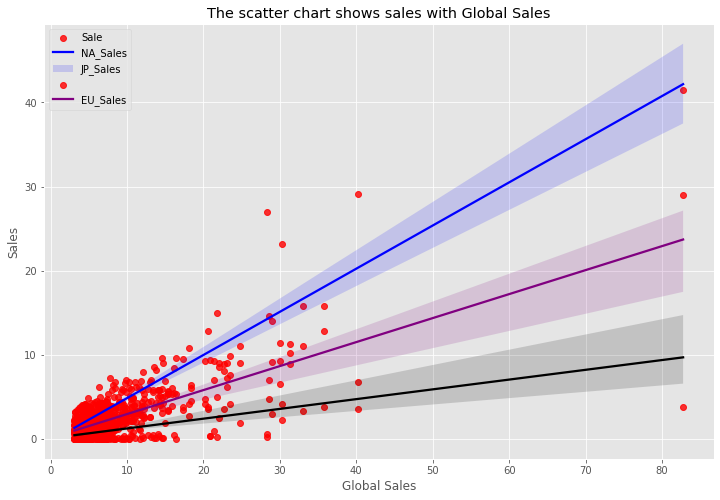

In [56]:
# Scatter Chart 
fig =sns.regplot(x= 'Global_Sales', y='NA_Sales', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"}, label="to")
fig= sns.regplot(x= 'Global_Sales', y='EU_Sales', data=df, scatter_kws={"color":"red"}, line_kws={"color":"purple"}, label=" s")
fig=sns.regplot(x= 'Global_Sales', y='JP_Sales', data=df, scatter_kws={"color":"red"}, line_kws={"color":"black"},label="toto")
plt.title('The scatter chart shows sales with Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Sales')
plt.legend(['Sale', 'NA_Sales','JP_Sales','','EU_Sales'], loc=2)
plt.show()
